In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("Tata.csv")

In [3]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']


In [4]:
data=df.sort_index(ascending=True,axis=0)
#new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Close'])
for i in range(0,len(data)):
    new_dataset["Close"][i]=data["Close"][i]


In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values


In [6]:

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

#new_dataset.set_index(new_dataset.Date)
#new_dataset.drop("Date",axis=1,inplace=True)
scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [7]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

927/927 - 29s - loss: 0.0027 - 29s/epoch - 31ms/step


In [8]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)


8/8 [==============================] - 3s 22ms/step


In [12]:
lstm_model.save("saved_model.h5")

In [9]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price

C:\Users\manik\AppData\Local\Temp\ipykernel_12252\506119891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


C:\Users\manik\AppData\Local\Temp\ipykernel_12252\1407860128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data['Predictions']=predicted_closing_price


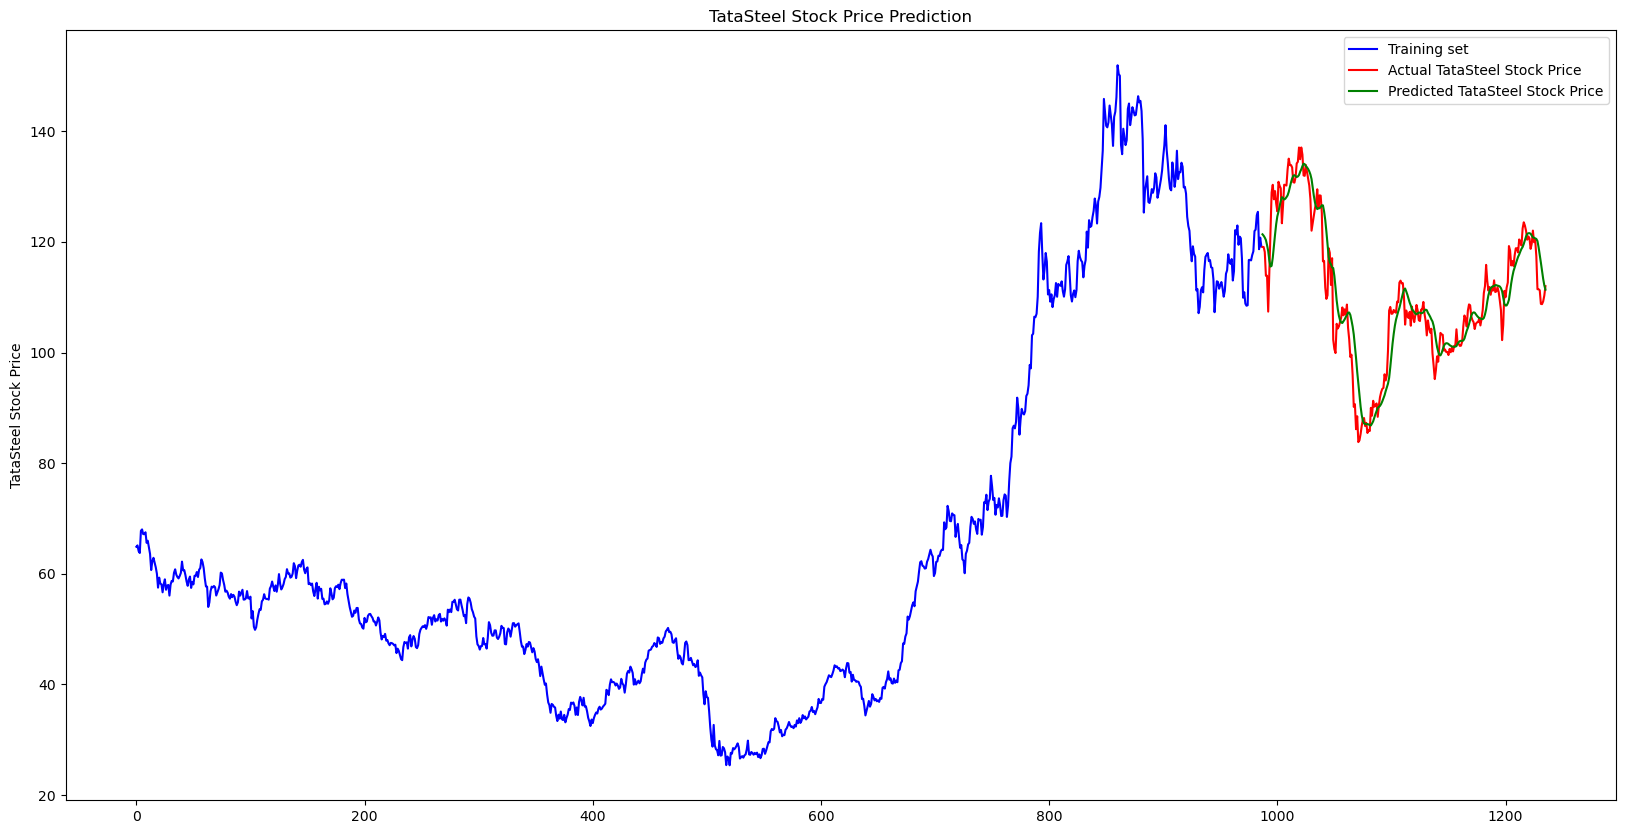

In [10]:
train_data=new_dataset[:987]
valid_data=new_dataset[987:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"], color = 'blue', label = "Training set")
plt.plot (valid_data[['Close']], color = 'red', label = "Actual TataSteel Stock Price")
plt.plot (valid_data[['Predictions']],color = "green", label = "Predicted TataSteel Stock Price")
plt.title("TataSteel Stock Price Prediction")

plt.ylabel( "TataSteel Stock Price")
plt.legend ()

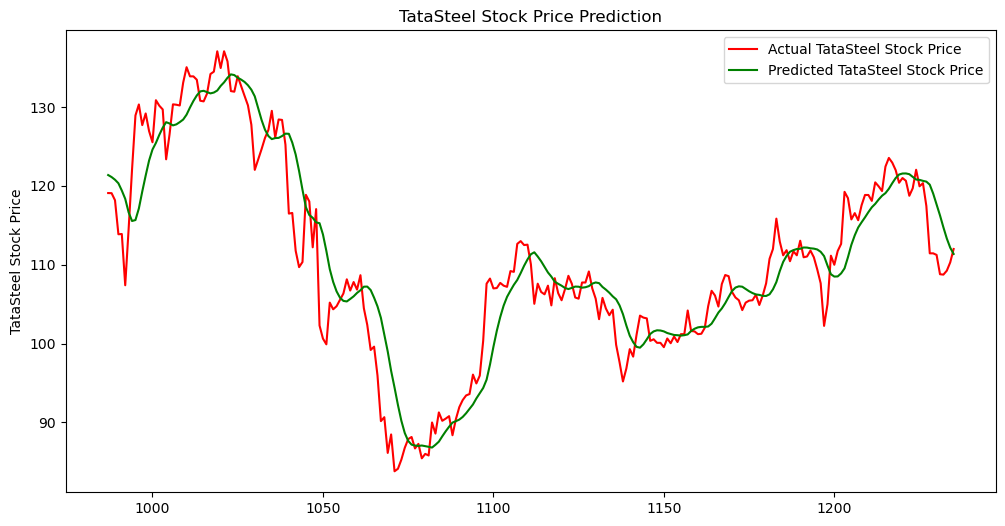

In [11]:
plt.figure(figsize=(12,6))
plt.plot (valid_data[['Close']], color = 'red', label = "Actual TataSteel Stock Price")
plt.plot (valid_data[['Predictions']],color = "green", label = "Predicted TataSteel Stock Price")
plt.title("TataSteel Stock Price Prediction")

plt.ylabel( "TataSteel Stock Price")
plt.legend ()